In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

In [34]:
x = np.random.uniform(0.1,5,10000)
noise = np.random.normal(scale =3, size = x.size)
y = 5/x + x**2 + noise
df = pd.DataFrame({'y':y, 'x':x})
df.head()

,y,x
0,3.549842,2.065820
1,5.245705,1.334867
2,14.274210,3.183932
3,9.061919,1.409211
4,32.059090,0.170647


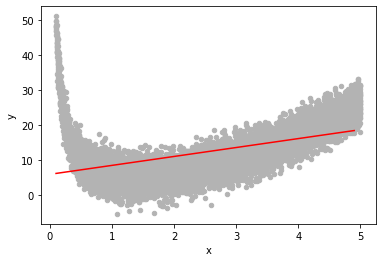

In [35]:
ax = df.plot.scatter(x = 'x', y = 'y', color = '0.7')

lr = LR()
lr.fit(df[['x']], df[['y']])
x = np.arange(0.1,5,0.1).reshape(-1,1)
ax.plot(x, lr.predict(x), 'r')

In [36]:
def get_xterms(x):
    t = pd.DataFrame({'x':x})
    t['1/x'] = 1/t['x']
    t['log2(x)'] = np.log2(t['x'])
    t['x**2'] = t['x'] ** 2
    t['x**3'] = t['x'] ** 3
    return t

get_xterms(df['x'])

,x,1/x,log2(x),x**2,x**3
0,2.065820,0.484069,1.046715,4.267612,8.816119
1,1.334867,0.749138,0.416696,1.781869,2.378558
2,3.183932,0.314077,1.670809,10.137422,32.276858
3,1.409211,0.709617,0.494888,1.985875,2.798517
4,0.170647,5.860062,-2.550916,0.029120,0.004969
...,...,...,...,...,...
9995,2.227865,0.448860,1.155662,4.963384,11.057750
9996,1.641153,0.609328,0.714710,2.693383,4.420254
9997,1.496578,0.668191,0.581668,2.239746,3.351955
9998,0.923281,1.083094,-0.115158,0.852448,0.787049


(array([[ 1.80980749,  4.69137162, -1.0877595 ,  0.61932792,  0.03535463]]),
 array([-1.15784356]))

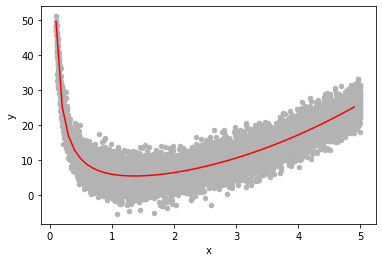

In [37]:
ax = df.plot.scatter(x = 'x', y = 'y', color = '0.7')

lr = LR()
lr.fit(get_xterms(df['x']), df[['y']])
x = np.arange(0.1, 5,0.1)
ax.plot(x, lr.predict(get_xterms(x)), 'r')
lr.coef_, lr.intercept_

In [43]:
x = np.random.uniform(0.1,5,10)
noise = np.random.normal(scale = 1, size = x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({'y':y, 'x':x})
df.head()

,y,x
0,1.147500,3.660742
1,2.281029,2.989291
2,-0.435391,3.967150
3,2.012318,2.965544
4,1.740251,1.304610


In [49]:
poly = PolynomialFeatures(15, include_bias = True)
columns = ['x']
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns = poly.get_feature_names(columns))
poly_df

,1,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,1.0,3.660742,13.401031,49.057717,179.587642,657.424008,2406.659622,8810.159755,32251.721096,118065.227261,432206.326193,1.582196e+06,5.792011e+06,2.120306e+07,7.761891e+07,2.841428e+08
1,1.0,2.989291,8.935859,26.711878,79.849567,238.693564,713.524435,2132.931912,6375.953392,19059.577771,56974.617361,1.703137e+05,5.091171e+05,1.521899e+06,4.549399e+06,1.359947e+07
2,1.0,3.967150,15.738277,62.436101,247.693361,982.636647,3898.266702,15465.007669,61352.000892,243392.573358,965574.780030,3.830580e+06,1.519648e+07,6.028672e+07,2.391665e+08,9.488092e+08
3,1.0,2.965544,8.794454,26.080344,77.342419,229.362381,680.184334,2017.116876,5981.849751,17739.441313,52607.101681,1.560087e+05,4.626507e+05,1.372011e+06,4.068760e+06,1.206609e+07
4,1.0,1.304610,1.702006,2.220454,2.896826,3.779227,4.930416,6.432269,8.391600,10.947763,14.282557,1.863316e+01,2.430900e+01,3.171376e+01,4.137408e+01,5.397703e+01
5,1.0,3.634666,13.210799,48.016847,174.525217,634.340927,2305.617603,8380.150644,30459.051290,110708.487821,402388.411874,1.462548e+06,5.315873e+06,1.932142e+07,7.022692e+07,2.552514e+08
6,1.0,3.776959,14.265421,53.879912,203.502231,768.619623,2903.044959,10964.682371,41413.157971,156415.808060,590776.125507,2.231337e+06,8.427670e+06,3.183097e+07,1.202243e+08,4.540821e+08
7,1.0,2.455233,6.028167,14.800553,36.338800,89.220206,219.056359,537.834317,1320.508354,3242.155177,7960.245126,1.954425e+04,4.798569e+04,1.178160e+05,2.892658e+05,7.102147e+05
8,1.0,3.838377,14.733138,56.551339,217.065362,833.178702,3198.053992,12275.336991,47117.371568,180854.236842,694186.748866,2.664550e+06,1.022755e+07,3.925719e+07,1.506839e+08,5.783816e+08
9,1.0,1.053084,1.108986,1.167855,1.229850,1.295135,1.363886,1.436287,1.512531,1.592822,1.677376,1.766417e+00,1.860186e+00,1.958932e+00,2.062920e+00,2.172428e+00


(array([[ 5.15385335e+02,  7.53853657e+02,  5.86793242e+02,
          4.18775080e+01, -5.64463272e+02, -6.78444846e+02,
          2.50065945e+00,  7.66497112e+02,  2.03294864e+02,
         -9.47667443e+02,  6.82683559e+02, -2.41716501e+02,
          4.75248229e+01, -4.98953987e+00,  2.19243119e-01]]),
 array([-1195.69436199]))

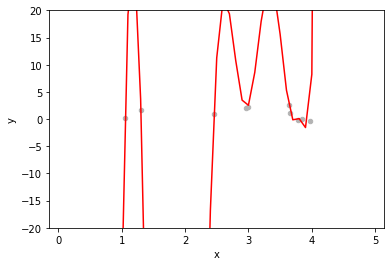

In [47]:
lr = LR()
lr.fit(poly_df, df[['y']])
ax = df.plot.scatter(x='x', y='y', color = '0.7', ylim = (-20,20))

fit_x = np.arange(0.1, 5,0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, 'r')
lr.coef_, lr.intercept_

In [50]:
df = pd.DataFrame()
rows = 100
df['w_in'] = np.random.uniform(5,50,rows)
df['h_in'] = np.random.uniform(5,50,rows)
df['border_in'] = 2*df['w_in'] + 2*df['h_in']
df['w_cm'] = df['w_in'] * 2.54
df['h_cm'] = df['h_in'] * 2.54
df += np.random.normal(size=(df.shape))
df.head(10)

,w_in,h_in,border_in,w_cm,h_cm
0,38.145948,29.259703,133.643788,92.140277,76.336382
1,24.798365,26.548952,103.105388,66.651729,64.621129
2,17.982040,13.764339,69.174650,51.008517,36.151230
3,40.985415,41.609128,162.673756,105.010520,104.560953
4,15.718493,44.078022,116.025054,36.727838,110.480273
5,7.246878,11.056975,34.416037,11.287603,30.042603
6,6.353475,41.403338,99.170559,19.964562,108.099324
7,46.992227,43.291521,183.484375,121.473453,111.085131
8,42.758205,43.374476,170.045674,103.063544,112.729912
9,8.298602,35.066713,83.179940,16.540247,88.971873


In [57]:
df.mean()

w_in          26.120686
h_in          27.052466
border_in    105.813057
w_cm          66.001095
h_cm          68.304229
dtype: float64

In [59]:
df0 = df-df.mean()
df.head()

,w_in,h_in,border_in,w_cm,h_cm
0,38.145948,29.259703,133.643788,92.140277,76.336382
1,24.798365,26.548952,103.105388,66.651729,64.621129
2,17.982040,13.764339,69.174650,51.008517,36.151230
3,40.985415,41.609128,162.673756,105.010520,104.560953
4,15.718493,44.078022,116.025054,36.727838,110.480273


In [75]:
cov = np.dot(df0.T, df0) / (len(df)-1)
cov = pd.DataFrame(cov, columns = df0.columns, index = df0.columns)
assert np.allclose(df.cov(), cov)
cov

,w_in,h_in,border_in,w_cm,h_cm
w_in,179.622670,3.353328,363.765863,453.755324,7.931056
h_in,3.353328,180.486277,362.447248,5.674997,454.982409
border_in,363.765863,362.447248,1445.993819,917.708359,917.886766
w_cm,453.755324,5.674997,917.708359,1153.388480,13.442548
h_cm,7.931056,454.982409,917.886766,13.442548,1153.533536


In [71]:
df.cov()

,w_in,h_in,border_in,w_cm,h_cm
w_in,179.622670,3.353328,363.765863,453.755324,7.931056
h_in,3.353328,180.486277,362.447248,5.674997,454.982409
border_in,363.765863,362.447248,1445.993819,917.708359,917.886766
w_cm,453.755324,5.674997,917.708359,1153.388480,13.442548
h_cm,7.931056,454.982409,917.886766,13.442548,1153.533536


In [74]:
np.allclose(df.cov(), cov)

True

In [76]:
df.std()

w_in         13.402338
h_in         13.434518
border_in    38.026225
w_cm         33.961574
h_cm         33.963709
dtype: float64

In [77]:
df0 = (df - df.mean()) / df.std()
df0

,w_in,h_in,border_in,w_cm,h_cm
0,0.897251,0.164296,0.731883,0.769669,0.236492
1,-0.098663,-0.037479,-0.071205,0.019158,-0.108442
2,-0.607256,-0.989103,-0.963504,-0.441457,-0.946687
3,1.109115,1.083527,1.495302,1.148634,1.067514
4,-0.776148,1.267299,0.268551,-0.861952,1.241797
...,...,...,...,...,...
95,-1.476779,-0.449077,-1.294396,-1.394454,-0.414511
96,1.801028,0.337208,1.412045,1.729811,0.309572
97,-0.428074,-0.545998,-0.639378,-0.419684,-0.560274
98,0.437502,0.323633,0.479194,0.421355,0.285379


In [78]:
corr = np.dot(df0.T, df0) / (len(df)-1)
corr = pd.DataFrame(corr, columns = df0.columns, index = df0.columns)
corr

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,0.018624,0.713770,0.996904,0.017423
h_in,0.018624,1.000000,0.709479,0.012438,0.997143
border_in,0.713770,0.709479,1.000000,0.710614,0.710707
w_cm,0.996904,0.012438,0.710614,1.000000,0.011654
h_cm,0.017423,0.997143,0.710707,0.011654,1.000000


In [79]:
df.corr()

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,0.018624,0.713770,0.996904,0.017423
h_in,0.018624,1.000000,0.709479,0.012438,0.997143
border_in,0.713770,0.709479,1.000000,0.710614,0.710707
w_cm,0.996904,0.012438,0.710614,1.000000,0.011654
h_cm,0.017423,0.997143,0.710707,0.011654,1.000000


In [81]:
assert np.allclose(df.corr(), corr)
corr

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,0.018624,0.713770,0.996904,0.017423
h_in,0.018624,1.000000,0.709479,0.012438,0.997143
border_in,0.713770,0.709479,1.000000,0.710614,0.710707
w_cm,0.996904,0.012438,0.710614,1.000000,0.011654
h_cm,0.017423,0.997143,0.710707,0.011654,1.000000


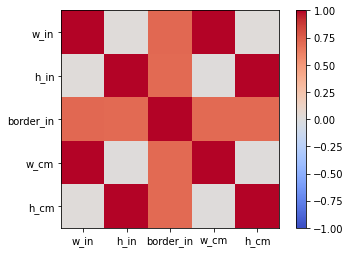

In [88]:
import matplotlib.pyplot as plt
ax = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()